In [1]:
%matplotlib inline
import sys
sys.path.append('./scripts')

# netcdf/numpy/xarray
import numpy as np
import netCDF4 as nc
import numpy.matlib
import datetime
import xarray as xr
from scipy import interpolate
from numpy import ma
from scipy import stats
import scipy.io as sio
import pickle as pickle
from sklearn import linear_model
import numpy.ma as ma
import matplotlib.patches as mpatches
from shapely.geometry.polygon import LinearRing

import scipy as sp
import pandas as pd

import time

from copy import copy 

#from joblib import Parallel, delayed
import multiprocessing

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap, cm
#import brewer2mpl as cbrew
from matplotlib import ticker

from matplotlib.ticker import FormatStrFormatter

from mpl_toolkits.axes_grid1.axes_divider import HBoxDivider
import mpl_toolkits.axes_grid1.axes_size as Size

from mpl_toolkits.axes_grid1 import make_axes_locatable

# from matplotlib.gridspec import GridSpec
#import matplotlib.gridspec as gridspec
from matplotlib import gridspec

# OS interaction
import os
import sys
import cftime

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

#from season_mean import season_mean

import matplotlib.colors as mcolors

import glob
import dask
import dask.bag as db

from scipy import interpolate

from windspharm.standard import VectorWind
import spharm

import statsmodels.stats.multitest as multitest

import metpy as mp
import metpy.calc as mpcalc


In [2]:
# ds_init = xr.open_dataset('/glade/u/home/mlague/cesmruns/ecohydro/scam_runs/scam_test_mpace_shrub/surfdata_64x128_16pfts_Irrig_CMIP6_simyr2000_c170824.nc')
ds_init = xr.open_dataset('//glade/u/home/mlague/cesmruns/nudging/ERA5_CONUS_pertland/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_c190214.nc')


In [3]:
ds_temp = ds_init.copy()


In [4]:
PFT_init = ds_init['PCT_NAT_PFT']

In [5]:
PFT_init

<xarray.DataArray 'PCT_NAT_PFT' (natpft: 15, lsmlat: 192, lsmlon: 288)>
[829440 values with dtype=float64]
Coordinates:
  * natpft   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
Dimensions without coordinates: lsmlat, lsmlon
Attributes:
    long_name:  percent plant functional type on the natural veg landunit (% ...
    units:      unitless

In [6]:
PFT_init.natpft

<xarray.DataArray 'natpft' (natpft: 15)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14], dtype=int32)
Coordinates:
  * natpft   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
Attributes:
    long_name:  indices of natural PFTs
    units:      index

In [7]:
PFT_new = PFT_init.copy()

In [8]:

print(ds_init['LATIXY'].shape)
print(ds_init['LATIXY'][155,200].values)
print(ds_init['LONGXY'][155,200].values)


(192, 288)
56.07329842931933
250.0


In [9]:
print(PFT_init[0,155,220].values)
print(PFT_init[11,155,220].values)


0.56382979004307
38.85106349252639


In [19]:
PFT_temp = PFT_init.copy()
PFT_temp[14,1:200,1:100] = PFT_init[14,1:200,1:100] + PFT_init[4,1:200,1:100]
PFT_temp[4,1:200,1:100] = PFT_init[4,1:200,1:100] - PFT_init[4,1:200,1:100]

In [10]:
PFT_new[11,155,220] = PFT_init[11,155,220] + .001 # PFT_init[0,155,220]
PFT_new[0,155,220] = PFT_init[0,155,220] - .001 # PFT_init[0,155,220]

In [11]:
print(PFT_init[0,155,220].values)
print(PFT_init[11,155,220].values)


0.56382979004307
38.85106349252639


In [12]:
print(PFT_new[0,155,220].values)
print(PFT_new[11,155,220].values)


0.56282979004307
38.85206349252639


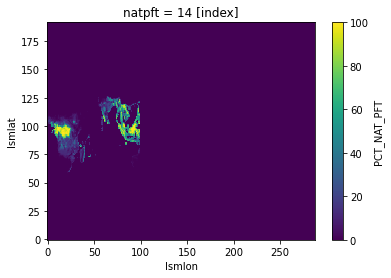

In [20]:
(PFT_temp[14,:,:] - PFT_init[14,:,:]).plot()
plt.show();plt.close()

In [13]:
# clobber everything N of 51.6 N with shrubs
# PFT_new[:,50::,:]=0.
# PFT_new[11,50::,:] = 100.

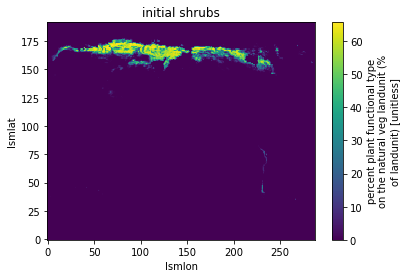

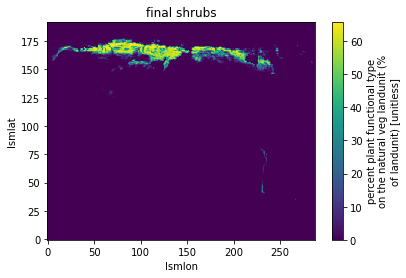

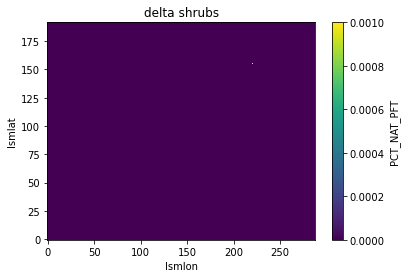

In [18]:
PFT_init[11,:,:].plot()
plt.title('initial shrubs')
plt.show();plt.close()

PFT_new[11,:,:].plot()
plt.title('final shrubs')
plt.show();plt.close()

(PFT_new[11,:,:]-PFT_init[11,:,:]).plot()
plt.title('delta shrubs')
plt.show();plt.close()


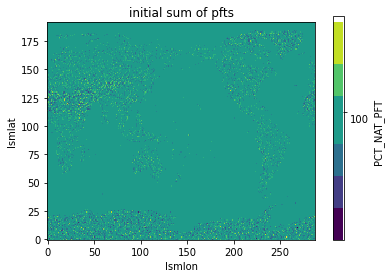

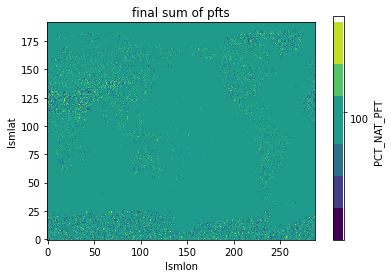

In [15]:
PFT_init.sum('natpft').plot()
plt.title('initial sum of pfts')
plt.show();plt.close()

PFT_new.sum('natpft').plot()
plt.title('final sum of pfts')
plt.show();plt.close()



In [16]:
ds_temp['PCT_NAT_PFT'].values = PFT_new.values

In [20]:
# newfile = '/glade/u/home/mlague/cesmruns/ecohydro/scam_runs/scam_test_mpace_shrub/surfdata_64x128_16pfts_Irrig_CMIP6_simyr2000_c170824_arctic_shrubs.nc'
newfile = '/glade/u/home/mlague/cesmruns/nudging/ERA5_CONUS_pertland/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_c190214_pert.nc'
newfile = '/glade/u/home/mlague/cesmruns/nudging/ERA5_CONUS_pertland/surfdata_pert.nc'


if os.path.exists(newfile):
    os.remove(newfile)
    print("removing existing copy of file")
else:
    print("The file does not exist to remove") 

ds_temp.to_netcdf(newfile)





The file does not exist to remove
